In [1]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

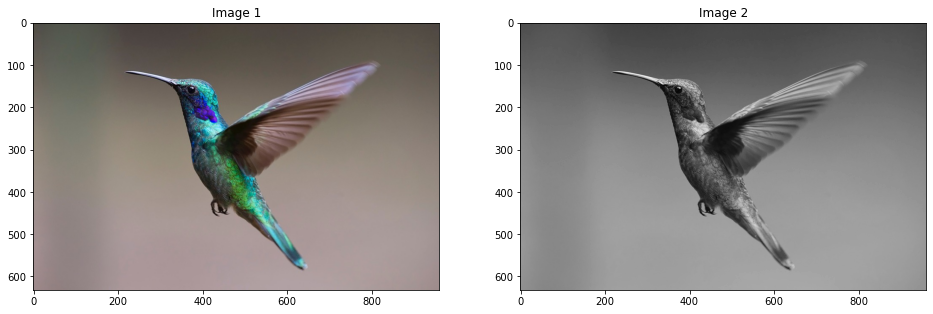

In [3]:
# Read Image 
image_color = imread("bird.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

In [4]:
# Show Information of Color Image
Image = image_color.copy()
Width = Image.shape[1]
Height = Image.shape[0]
Channel = len(Image.shape)
print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)

IM = image_color.copy
if(Channel == 2):
    print("Min Intensity: ", Image.min(), " Max Intensity: ", Image.max())
else:
    print("Red - Min Intensity: ", Image[:,:,0].min(), " Max Intensity: ", Image[:,:,0].max())
    print("Green - Min Intensity: ", Image[:,:,1].min(), " Max Intensity: ", Image[:,:,1].max())
    print("Blue - Min Intensity: ", Image[:,:,2].min(), " Max Intensity: ", Image[:,:,2].max())    

Width :  960  Height :  632  Channel :  3
Red - Min Intensity:  0  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  255
Blue - Min Intensity:  0  Max Intensity:  255


In [5]:
# Show Information of Gray Image
Image = image_gray.copy()
Width = Image.shape[1]
Height = Image.shape[0]
Channel = len(Image.shape)
print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)

IM = image_color.copy
if(Channel == 2):
    print("Min Intensity: ", Image.min(), " Max Intensity: ", Image.max())
else:
    print("Red - Min Intensity: ", Image[:,:,0].min(), " Max Intensity: ", Image[:,:,0].max())
    print("Green - Min Intensity: ", Image[:,:,1].min(), " Max Intensity: ", Image[:,:,1].max())
    print("Blue - Min Intensity: ", Image[:,:,2].min(), " Max Intensity: ", Image[:,:,2].max())    

Width :  960  Height :  632  Channel :  2
Min Intensity:  0  Max Intensity:  254


Original Size : (632, 960)
Rescaled Size 0.5 : (316, 480)
Rescaled Size 0.25 : (158, 240)


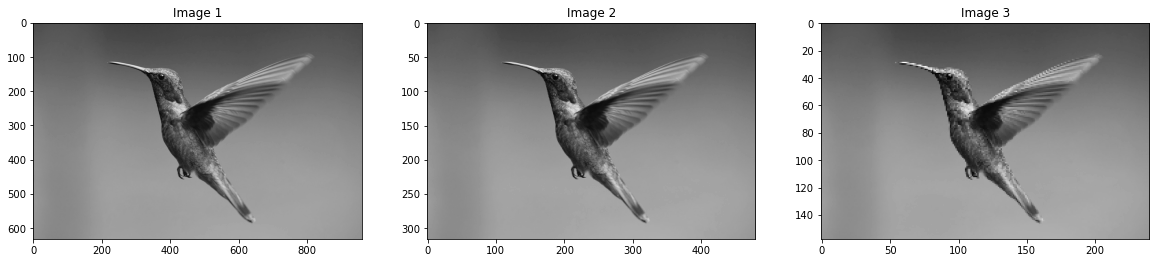

In [6]:
from skimage.transform import rescale, resize

image_gray_rescaled_05 = rescale(image_gray, 0.5, anti_aliasing=False)
image_gray_rescaled_025 = rescale(image_gray, 0.25, anti_aliasing=False)

print("Original Size :", image_gray.shape)
print("Rescaled Size 0.5 :", image_gray_rescaled_05.shape)
print("Rescaled Size 0.25 :", image_gray_rescaled_025.shape)

ShowThreeImages(image_gray, image_gray_rescaled_05,image_gray_rescaled_025)

Original Size : (632, 960)
Resized Size 0.5 : (300, 300)


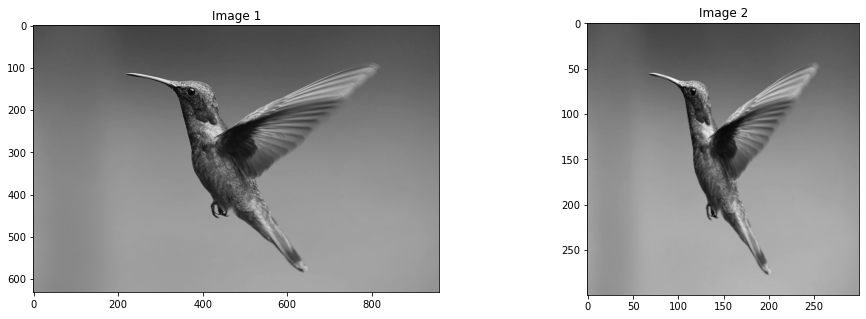

In [7]:
image_resized = resize(image_gray, (300, 300), anti_aliasing=True)

print("Original Size :", image_gray.shape)
print("Resized Size 0.5 :", image_resized.shape)

ShowTwoImages(image_gray, image_resized)

Image Size: (267, 350, 3)


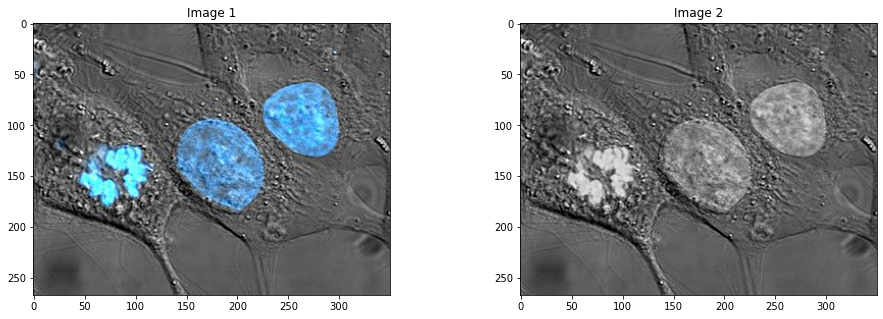

In [9]:
# Read Image 
image_color = imread("cell.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
print("Image Size:", image_color.shape)
ShowTwoImages(image_color, image_gray)

In [10]:
def intToBitArray(img) :
    row ,col = img.shape
    list = []
    for i in range(row):
        for j in range(col):
             list.append (np.binary_repr( img[i][j] ,width=8  ) )
    return list #the binary_repr() fucntion returns binary values but in 
                #string 
                #, not integer, which has it's own perk as you will notice 
def bitplane(bitImgVal , img1D ):
    bitList = [  int(   i[bitImgVal]  )    for i in img1D]
    return bitList
def GetBitImage(index, image2D):
    ImageIn1D = intToBitArray(image2D)
    Imagebit = np.array( bitplane(index, ImageIn1D ) )
    Imagebit = np.reshape(Imagebit , image2D.shape )
    return Imagebit
def GetAllBitImage(image2D):
    image2D_Bit = list()
    for i in range(8):
        image2D_Bit.append(GetBitImage(i, image2D))
    return image2D_Bit

In [11]:
# Get 8 Mask Image corresponding to 8 bit of grayscale image
image2D_Bit = GetAllBitImage(image_gray)

List have  8  images


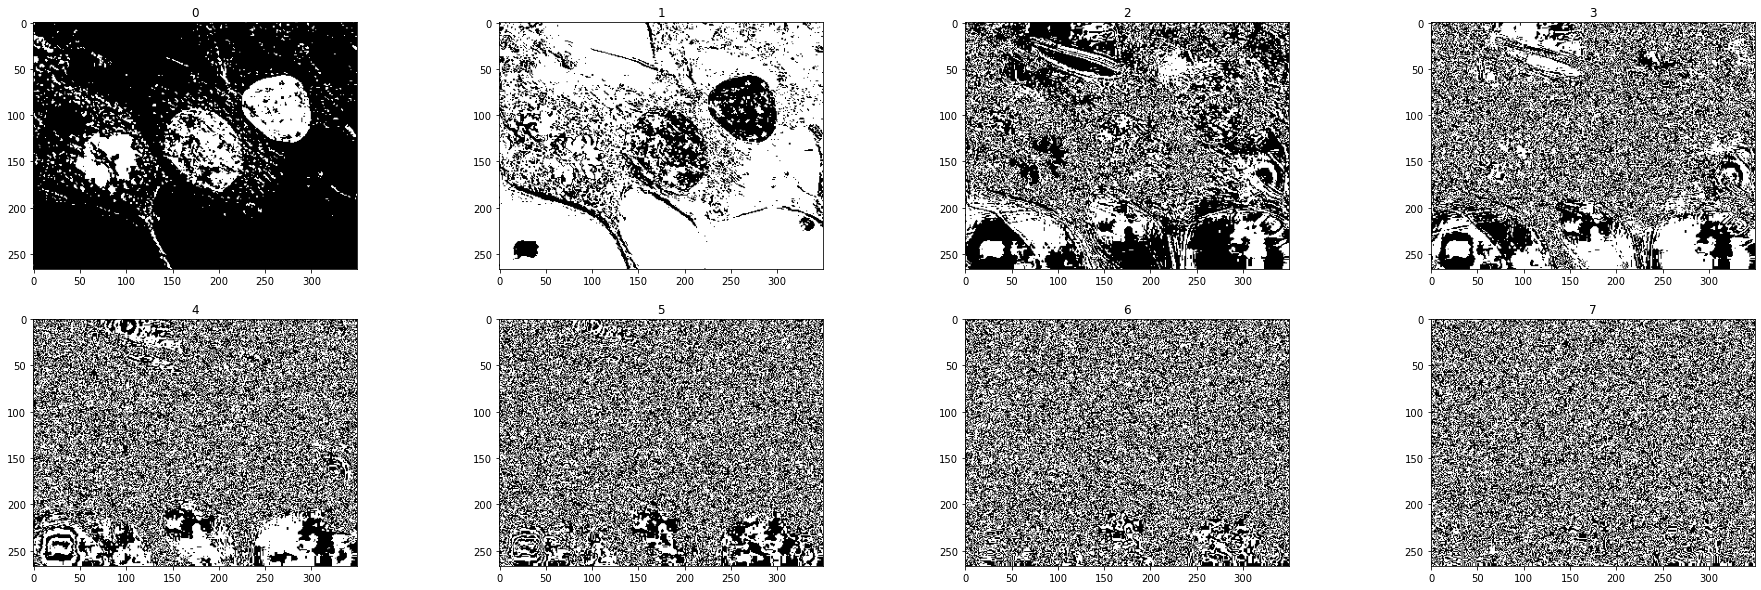

In [12]:
print("List have ", len(image2D_Bit), " images")
ShowListImages(image2D_Bit, 2, 4)

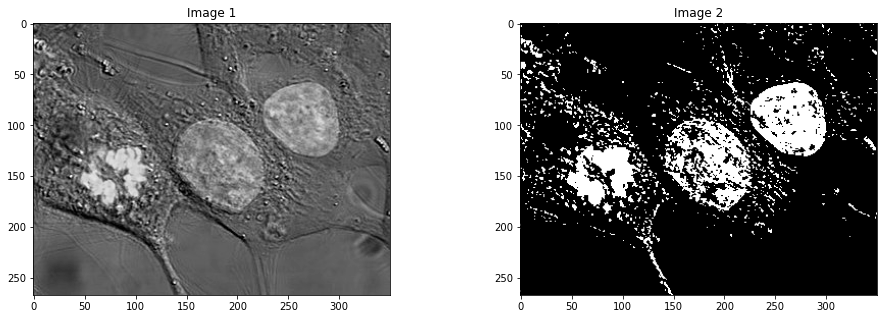

In [13]:
# Take the highest bit image 
CellMask01 = image2D_Bit[0]
ShowTwoImages(image_gray, CellMask01)

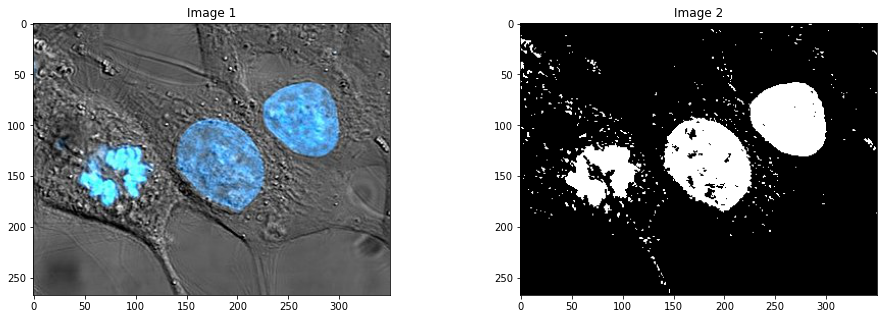

In [14]:
# Get color by range color in RGB from [0,0,150] to [255,255,255]
lower = np.array([0,0,150])
upper = np.array([255,255,255])
CellMask02 = cv2.inRange(image_color, lower, upper)
ShowTwoImages(image_color, CellMask02)

In [15]:
def SegmentColorImageByMask(IM, Mask):    
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

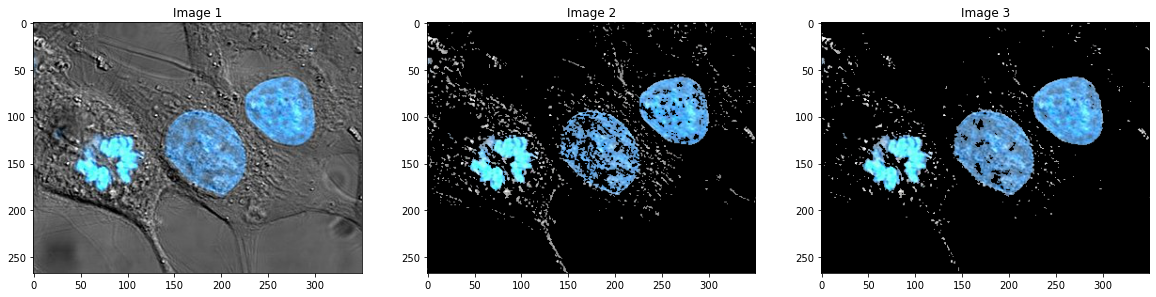

In [16]:
CellMask01_rgb = SegmentColorImageByMask(image_color, CellMask01)
CellMask02_rgb = SegmentColorImageByMask(image_color, CellMask02)
ShowThreeImages(image_color, CellMask01_rgb, CellMask02_rgb)

Image Size: (500, 500, 3)


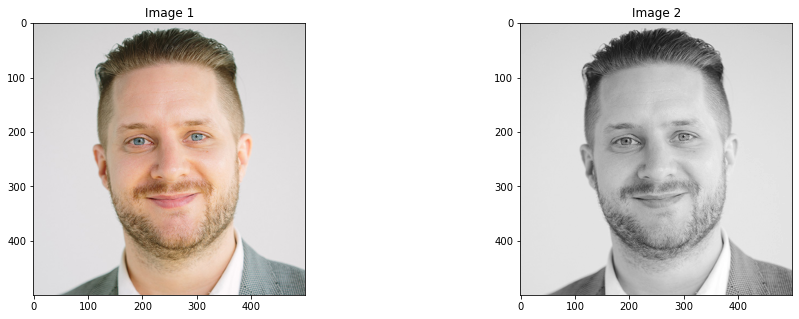

In [18]:
# Read Image 
image_color = imread("face.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
print("Image Size:", image_color.shape)
ShowTwoImages(image_color, image_gray)

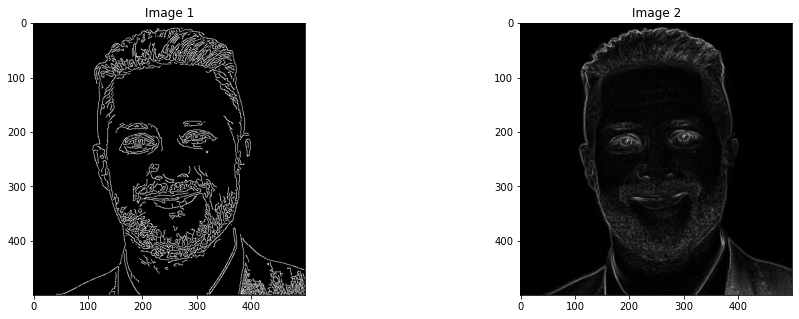

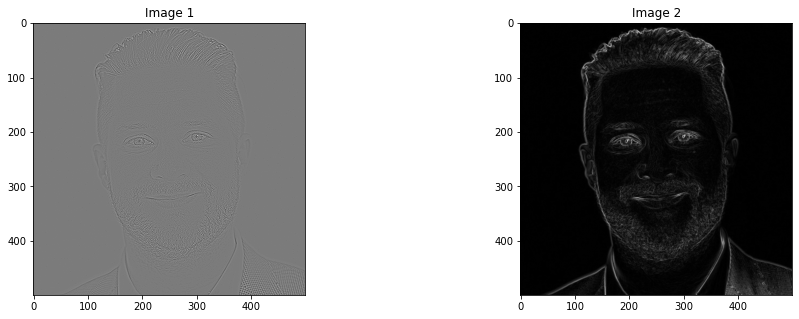

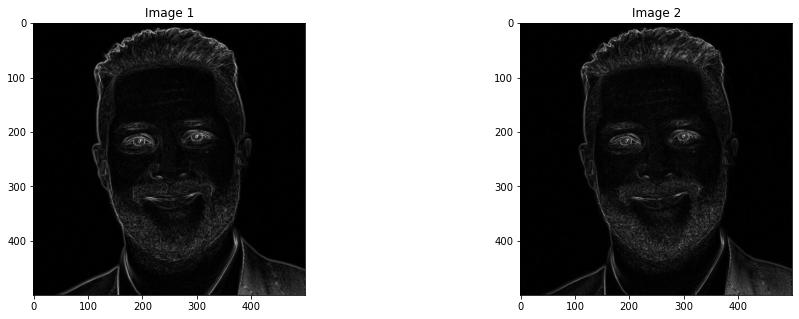

In [19]:
import cv2
from skimage import feature, filters

edges_canny = feature.canny(image_gray) # Canny
edges_sobel = filters.sobel(image_gray) # Sobel
edges_laplace = filters.laplace(image_gray) # Laplacian
edges_scharr = filters.scharr(image_gray) # Scharr
edges_prewitt = filters.prewitt(image_gray) # Prewitt
edges_roberts = filters.roberts(image_gray) # Roberts

ShowTwoImages(edges_canny, edges_sobel)
ShowTwoImages(edges_laplace, edges_scharr)
ShowTwoImages(edges_prewitt, edges_roberts)

In [20]:
# Show Information of Gray Image
Image = edges_sobel.copy()
Width = Image.shape[1]
Height = Image.shape[0]
Channel = len(Image.shape)
print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)

IM = image_color.copy
if(Channel == 2):
    print("Min Intensity: ", Image.min(), " Max Intensity: ", Image.max())
else:
    print("Red - Min Intensity: ", Image[:,:,0].min(), " Max Intensity: ", Image[:,:,0].max())
    print("Green - Min Intensity: ", Image[:,:,1].min(), " Max Intensity: ", Image[:,:,1].max())
    print("Blue - Min Intensity: ", Image[:,:,2].min(), " Max Intensity: ", Image[:,:,2].max()) 

Width :  500  Height :  500  Channel :  2
Min Intensity:  0.0  Max Intensity:  0.5026668594102899


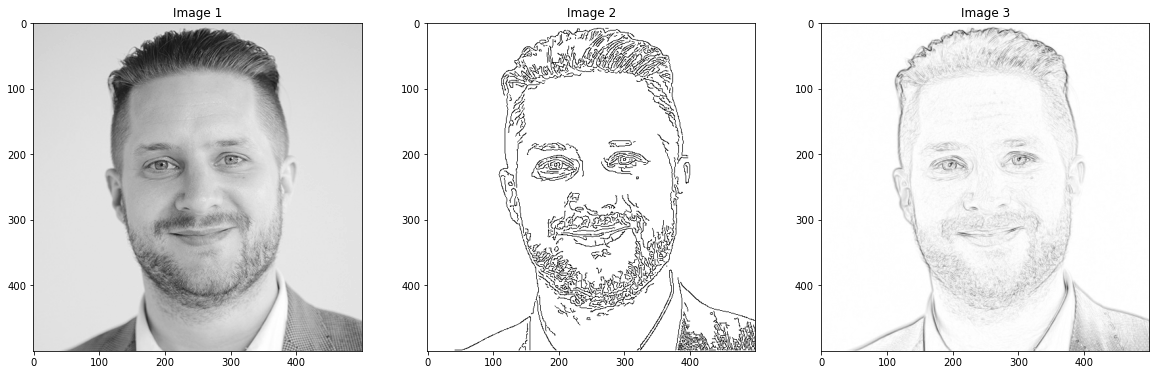

In [21]:
# Invert 
ShowThreeImages(image_gray, 1 - edges_canny, 1 - edges_sobel)

In [22]:
# Edge Detection on Color Image
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters

@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

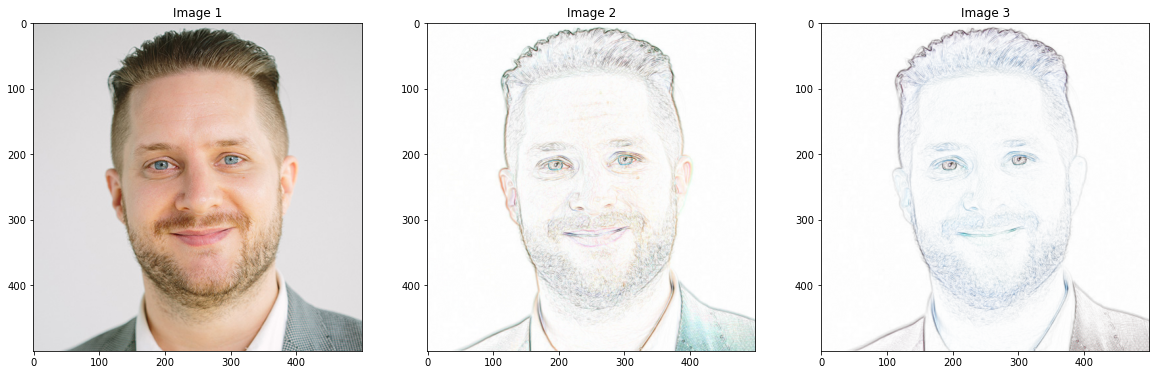

In [23]:
from skimage.exposure import rescale_intensity

image_sobel_rgb = rescale_intensity(1 - sobel_each(image_color))
image_sobel_hsv = rescale_intensity(1 - sobel_hsv(image_color))

ShowThreeImages(image_color, image_sobel_rgb, image_sobel_hsv)

Image Size: (960, 1280, 3)


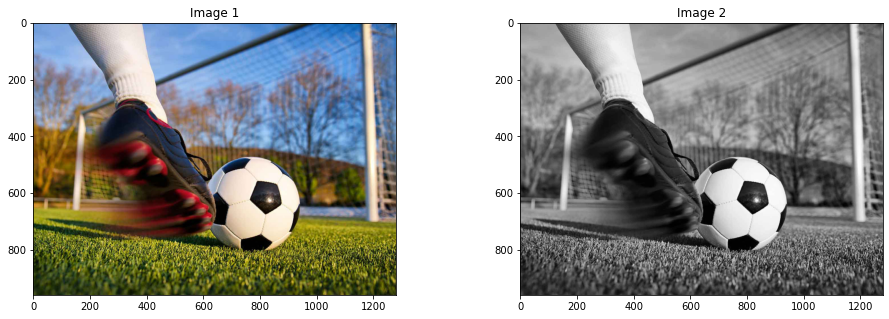

In [25]:
# Read Image 
image_color = imread("ball.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
print("Image Size:", image_color.shape)
ShowTwoImages(image_color, image_gray)

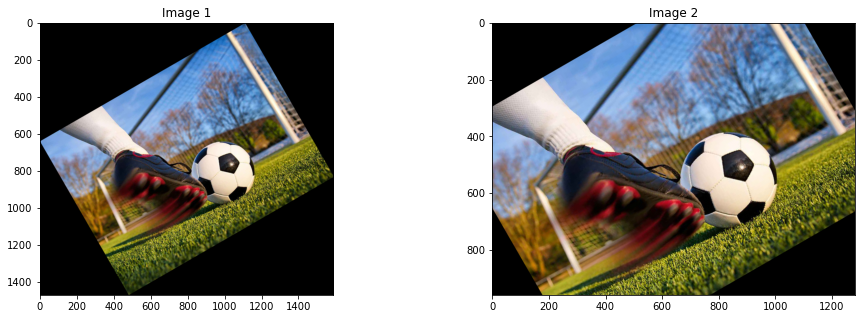

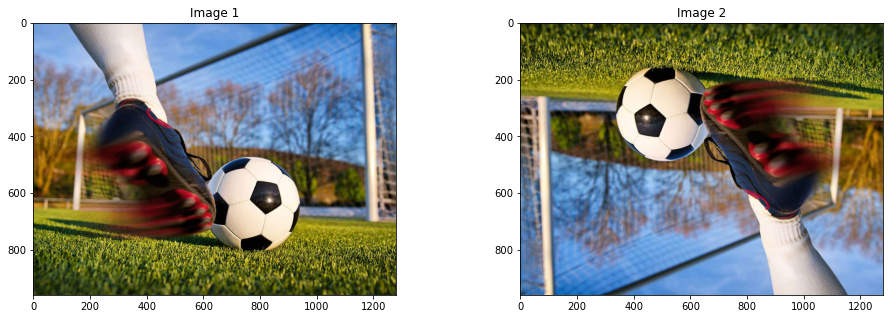

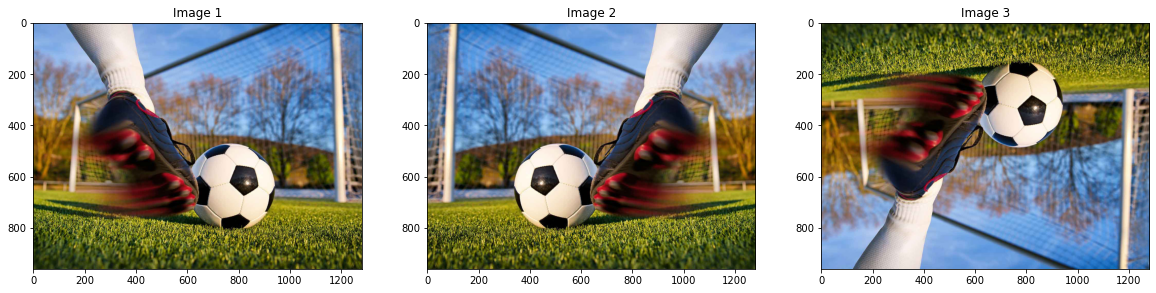

In [26]:
from skimage.transform import rotate
image_color_rotate_30_01 = rotate(image_color, 30, resize=True)
image_color_rotate_30_02 = rotate(image_color, 30)
ShowTwoImages(image_color_rotate_30_01, image_color_rotate_30_02)

image_color_rotate_180 = rotate(image_color, 180, resize=True)
ShowTwoImages(image_color, image_color_rotate_180)

image_color_horizontal_flip = image_color[:, ::-1]
image_color_vertical_flip = image_color[::-1, :]

ShowThreeImages(image_color, image_color_horizontal_flip,image_color_vertical_flip)

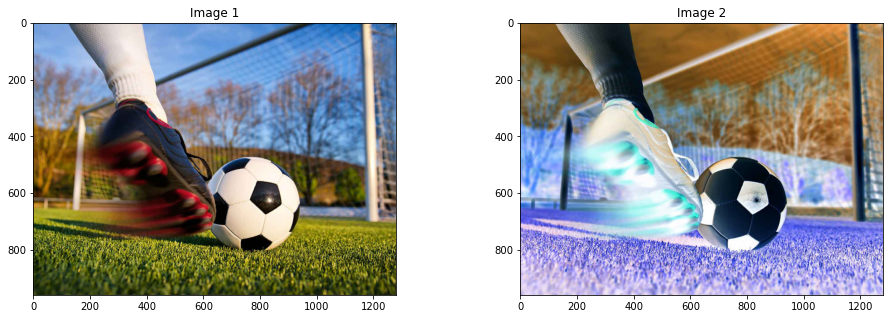

In [27]:
from skimage import util
image_color_inversion = util.invert(image_color)
ShowTwoImages(image_color, image_color_inversion)

Image Size: (1440, 1920, 3)


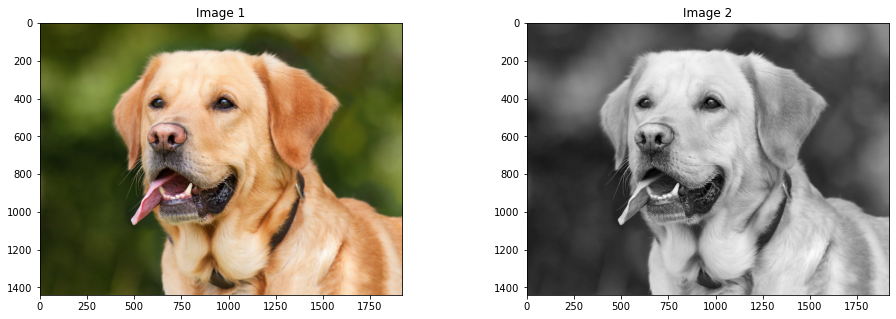

In [28]:
# Read Image 
image_color = imread("dog.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
print("Image Size:", image_color.shape)
ShowTwoImages(image_color, image_gray)

23.0 219.0


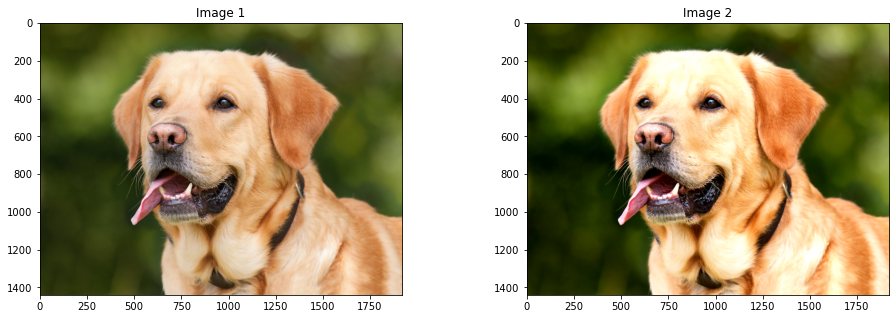

In [29]:
import numpy as np
from skimage import exposure

# take from 10 to 90 percent of color range
v_min, v_max = np.percentile(image_color, (10, 90))
better_contrast = exposure.rescale_intensity(image_color, in_range=(v_min, v_max))

print(v_min, v_max)
ShowTwoImages(image_color, better_contrast)

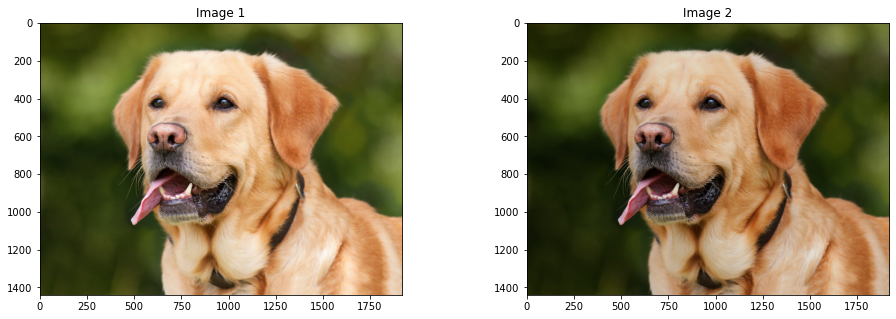

In [30]:
# gamma and gain parameters are between 0 and 1
adjusted_gamma_image = exposure.adjust_gamma(image_color, gamma=1.2, gain=0.9)
ShowTwoImages(image_color, adjusted_gamma_image)

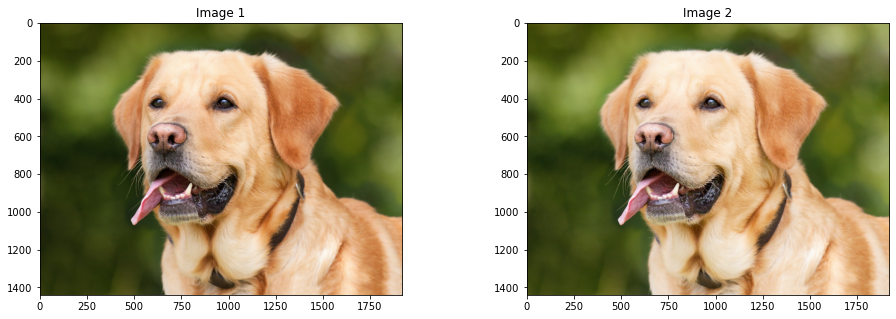

In [31]:
# Logarithmic corrected
log_correction_image = exposure.adjust_log(image_color)

ShowTwoImages(image_color, log_correction_image)